In [4]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [55]:
alpha, sigma = 1,1
beta = [1, 2.5]

data_set_size = 100

In [48]:
generated_set= np.random.randn(data_set_size,3)

In [49]:
generated_set[:4]

array([[ 0.26383382, -0.04271573,  0.74185802],
       [-0.56654613, -0.55783539,  0.19925602],
       [ 1.09787489, -1.73099118,  1.12355716],
       [ 1.18285509,  1.36033037,  1.17195419]])

In [50]:
X=generated_set*np.array([1,0.25,1])

In [51]:
X[:4]

array([[ 0.26383382, -0.01067893,  0.74185802],
       [-0.56654613, -0.13945885,  0.19925602],
       [ 1.09787489, -0.4327478 ,  1.12355716],
       [ 1.18285509,  0.34008259,  1.17195419]])

In [56]:
Y = alpha + X.dot(np.array(beta+[sigma]).T)

In [57]:
X1 = X[:,0]
X2 = X[:,1]
X1.shape

(100,)

In [60]:
X2[:4]

array([-0.01067893, -0.13945885, -0.4327478 ,  0.34008259])

Text(0.5, 0, 'X2')

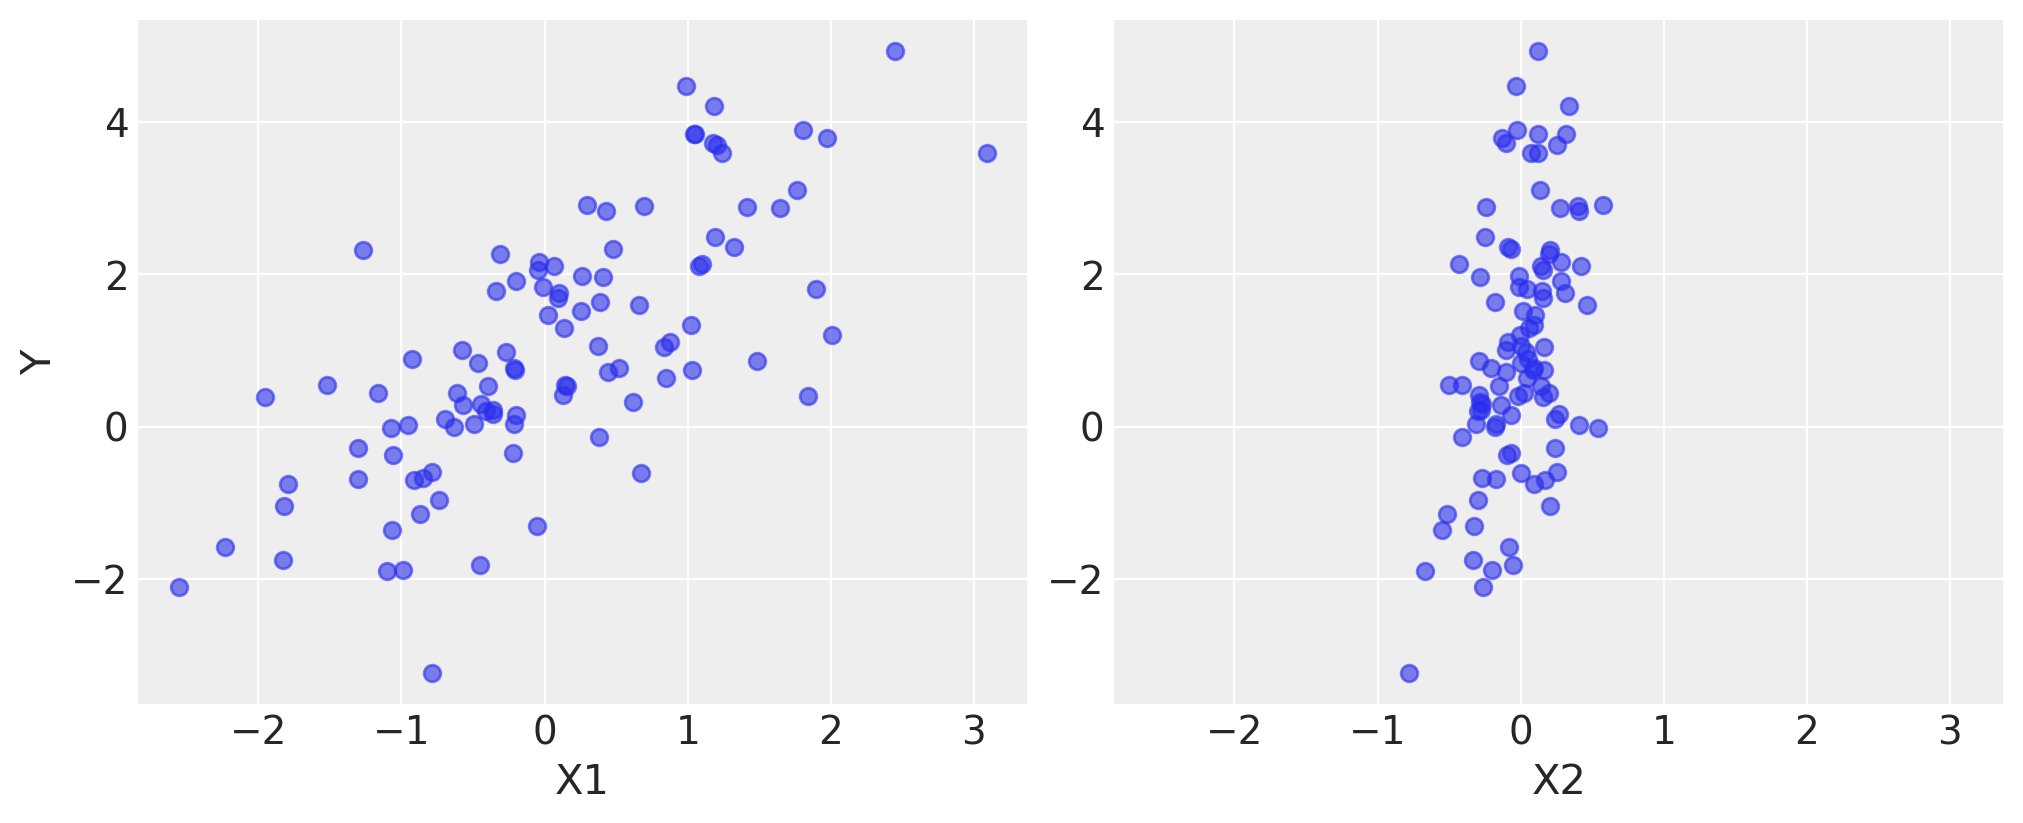

In [61]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha = 0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2")

In [62]:
import pymc as pm

print(f"Funning on PyMC v{pm.__version__}")

Funning on PyMC v5.1.1


In [63]:
basic_model = pm.Model()

with basic_model:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma =1)

    mu = alpha + beta[0]*X1 + beta[1]*X2

    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [64]:
with basic_model:
    idata = pm.sample()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [65]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

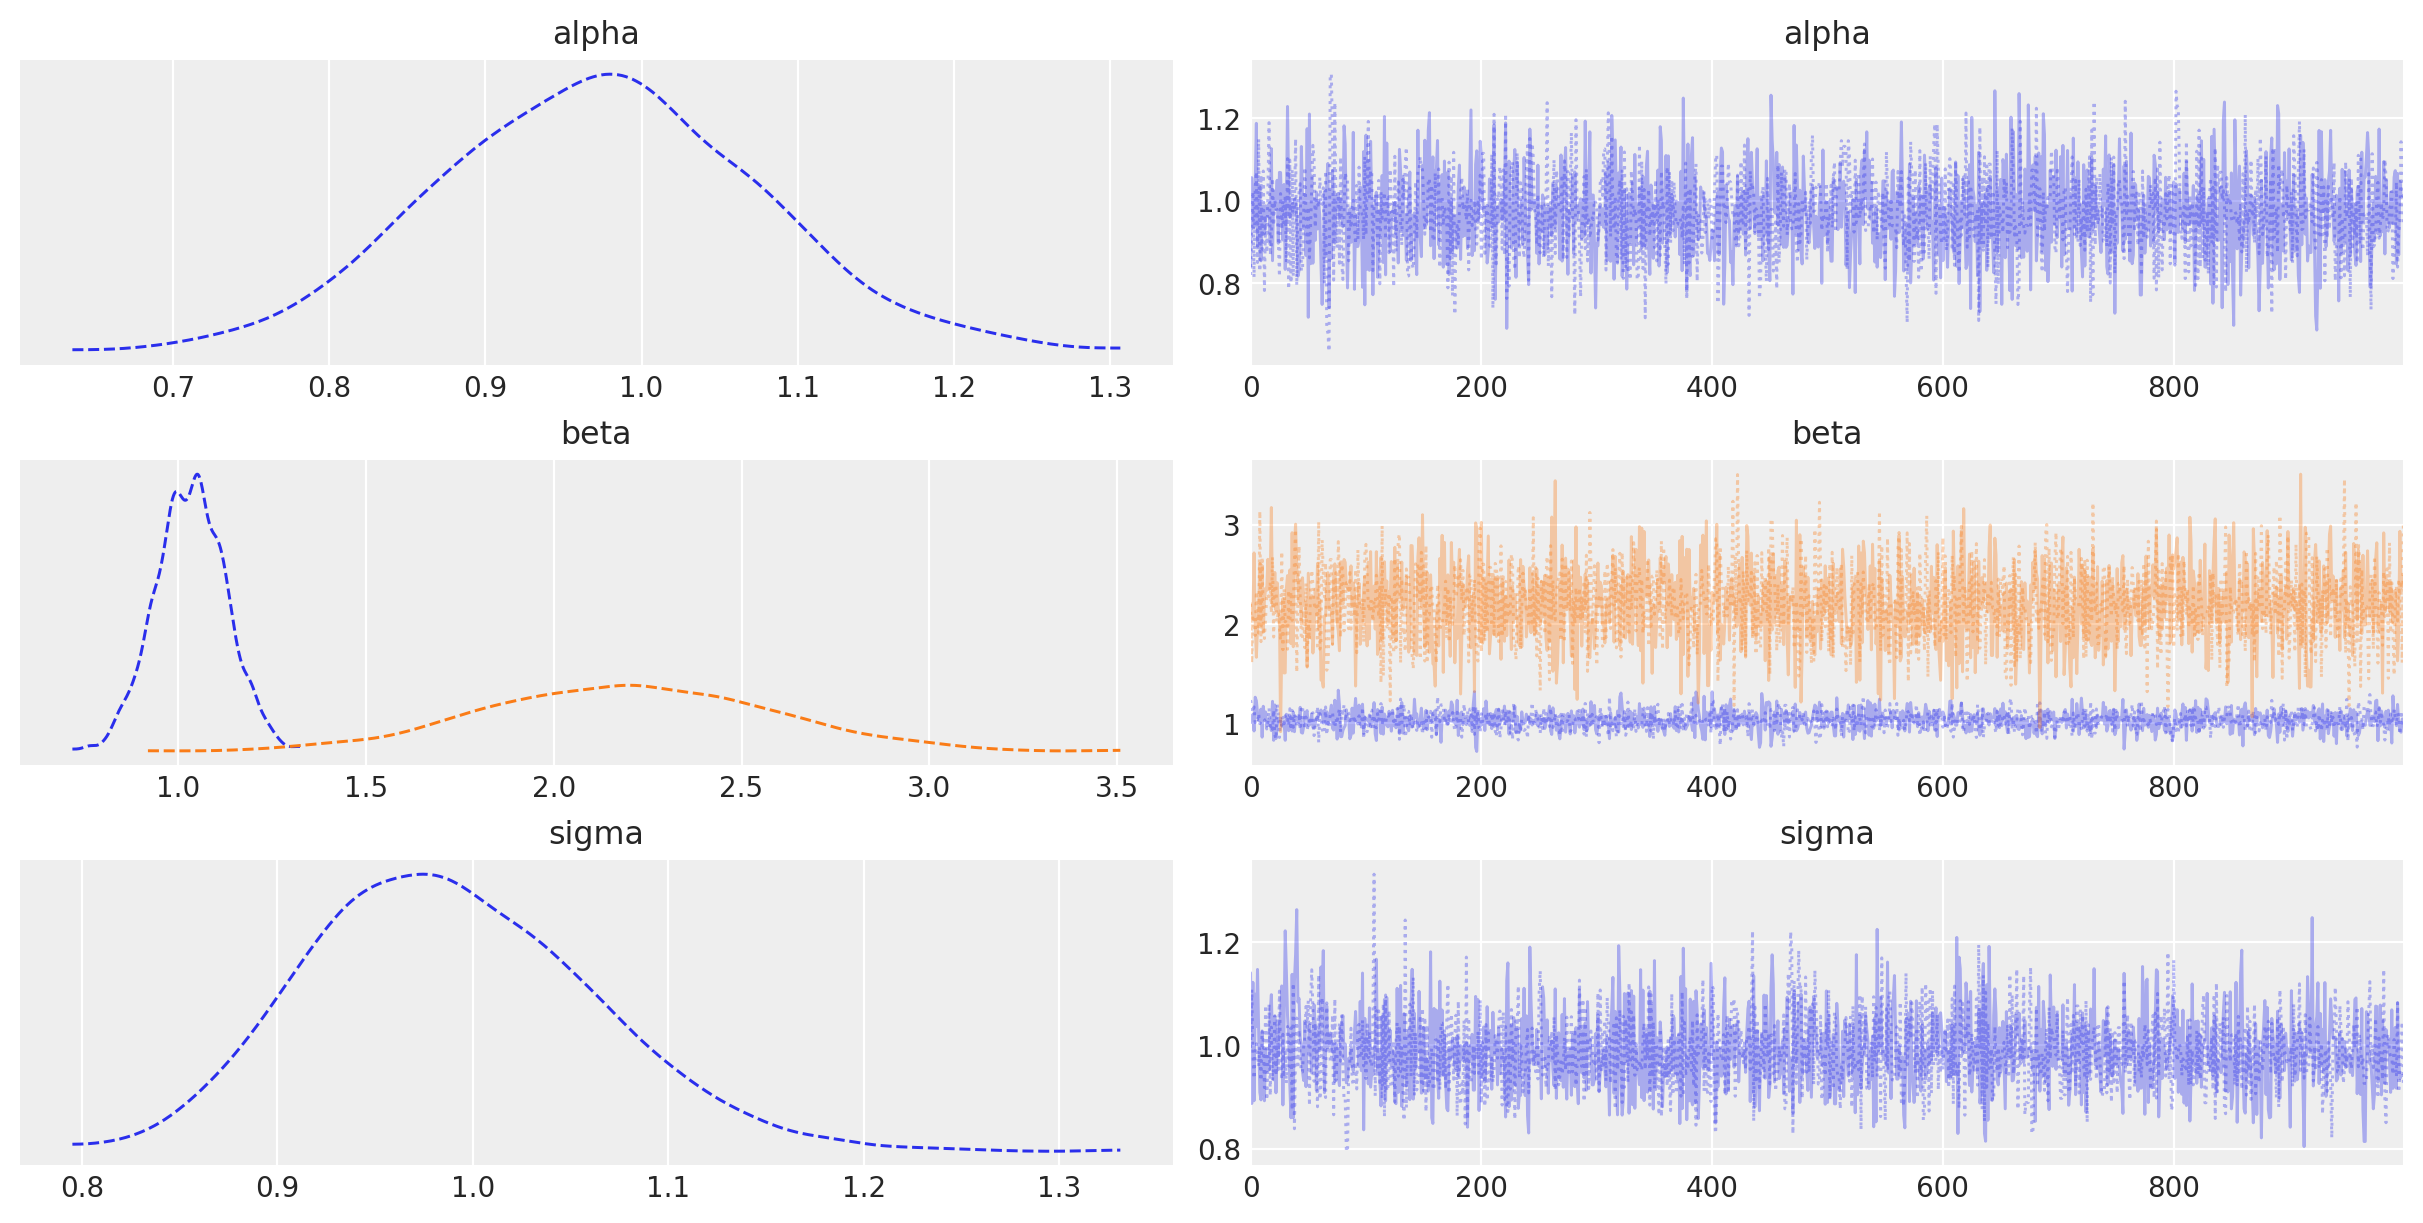

In [66]:
az.plot_trace(idata, combined=True)

In [67]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.97,0.10,0.77,1.15,0.00,0.00,3059.99,1722.67,1.0
beta[0],1.03,0.09,0.86,1.21,0.00,0.00,2761.63,1758.34,1.0
beta[1],2.20,0.38,1.50,2.94,0.01,0.01,2787.98,1436.05,1.0
sigma,0.99,0.07,0.86,1.13,0.00,0.00,3046.62,1246.37,1.0
